In [311]:
import pandas
import numpy
import math

import matplotlib
from matplotlib import pyplot
from mpl_toolkits import mplot3d

import seaborn

from scipy.stats import mode
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.learning_curve import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

from sklearn import metrics

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [150]:
#load csv
insurance_data_frame = pandas.read_csv('data/insurance.csv')

In [151]:
insurance_data_frame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


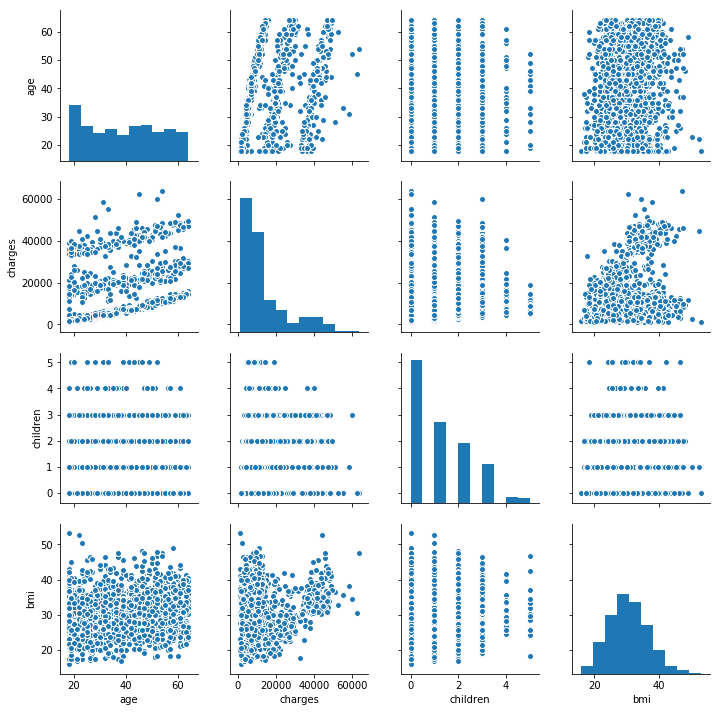

In [152]:
#visualizing and understanding data
seaborn.pairplot(data=insurance_data_frame[['age', 'charges', 'children', 'bmi']]) 

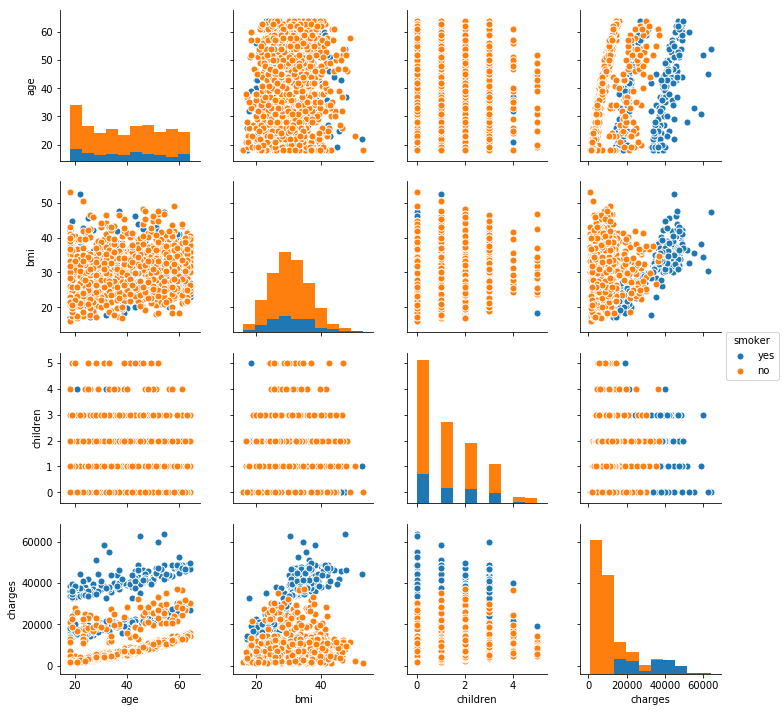

In [153]:
seaborn.pairplot(data=insurance_data_frame, hue='smoker', plot_kws={"s": 50})

In [154]:
#data transformation
transformed_insurance_data_frame = insurance_data_frame.copy(deep=True)
transformed_insurance_data_frame['is_male'] = transformed_insurance_data_frame['sex'].apply(
    lambda value: 1 if value == 'male' else 0)
transformed_insurance_data_frame['is_smoker'] = transformed_insurance_data_frame['smoker'].apply(
    lambda value: 1 if value == 'yes' else 0)
transformed_insurance_data_frame = pandas.get_dummies(transformed_insurance_data_frame,\
    columns=["region"])
transformed_insurance_data_frame['charges'] = transformed_insurance_data_frame['charges'].divide(10000)

transformed_insurance_data_frame.head()

,age,sex,bmi,children,smoker,charges,is_male,is_smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,1.688492,0,1,0,0,0,1
1,18,male,33.770,1,no,0.172555,1,0,0,0,1,0
2,28,male,33.000,3,no,0.444946,1,0,0,0,1,0
3,33,male,22.705,0,no,2.198447,1,0,0,1,0,0
4,32,male,28.880,0,no,0.386686,1,0,0,1,0,0


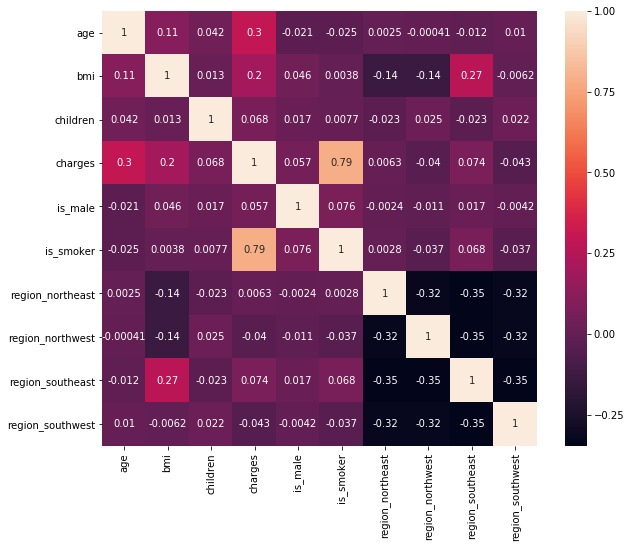

In [155]:
f,ax = pyplot.subplots(figsize=(10, 8))
seaborn.heatmap(transformed_insurance_data_frame.corr(), annot=True, square=True, ax=ax)

In [156]:
#building training set
train_data_frame = transformed_insurance_data_frame.drop(columns=['sex', 'smoker'])
test_data_frame = train_data_frame.sample(frac=0.25)
train_data_frame = train_data_frame.loc[~(train_data_frame.index.isin(test_data_frame.index))]

train_input = train_data_frame.drop(columns=['charges']).values
train_output = train_data_frame['charges'].values

test_input = test_data_frame.drop(columns=['charges']).values
test_output = test_data_frame['charges'].values

In [157]:
#training a model
linear_model = LinearRegression()
linear_model.fit(train_input, train_output.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [158]:
output_prediction = linear_model.predict(train_input)

In [159]:
output_prediction[:5]

array([[0.32749478],
       [0.65190063],
       [0.44017691],
       [0.5912136 ],
       [0.39685506]])

In [160]:
prediction_list = output_prediction.reshape(-1,)
prediction_list[:5]

array([0.32749478, 0.65190063, 0.44017691, 0.5912136 , 0.39685506])

In [161]:
train_input[:5]

array([[18.   , 33.77 ,  1.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ],
       [28.   , 33.   ,  3.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ],
       [33.   , 22.705,  0.   ,  1.   ,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ],
       [32.   , 28.88 ,  0.   ,  1.   ,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ],
       [31.   , 25.74 ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ]])

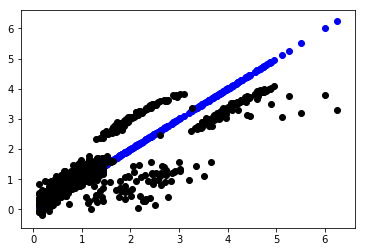

In [162]:
#visualizing results
pyplot.scatter(train_data_frame['charges'], train_output,\
    color='blue')
pyplot.scatter(train_data_frame['charges'], prediction_list,\
    color='black')

In [163]:
test_output_prediction = linear_model.predict(test_input)
test_prediction_list = test_output_prediction.reshape(-1,)

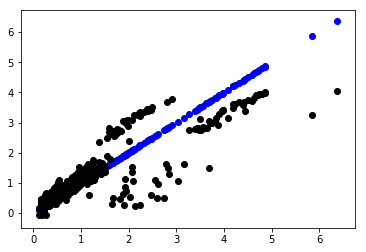

In [164]:
#visualizing results
pyplot.scatter(test_data_frame['charges'], test_output,\
    color='blue')
pyplot.scatter(test_data_frame['charges'], test_prediction_list,\
    color='black')

In [165]:
# error for mean line
metrics.mean_squared_error(train_output, numpy.full((len(train_output)), train_output.mean()))

1.4514903373139145

In [166]:
#train error
metrics.mean_squared_error(train_output, prediction_list)

0.3515035412983131

In [167]:
#test error
metrics.mean_squared_error(test_output, test_prediction_list)

0.4128572583446127

In [168]:
# The coefficients

print(linear_model.coef_)
print(linear_model.intercept_)

[[ 2.63961458e-02  2.87340625e-02  4.12848066e-02  1.77028563e-03
   2.40595558e+00  9.83417830e-03  4.74153313e-02 -2.85518170e-02
  -2.86976926e-02]]
[-1.13248841]


In [169]:
'''
resources:

http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
https://www.kaggle.com/mirichoi0218/insurance
'''

'\nresources:\n\nhttp://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html\nhttps://www.kaggle.com/mirichoi0218/insurance\n'

In [170]:
#polynomial regression
degrees = 3
polynomial_regression_model = make_pipeline(PolynomialFeatures(degrees),
                                            LinearRegression())

polynomial_regression_model.fit(train_input, train_output.reshape(-1, 1))

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [171]:
train_output_prediction = polynomial_regression_model.predict(train_input)
train_prediction_list = train_output_prediction.reshape(-1,)

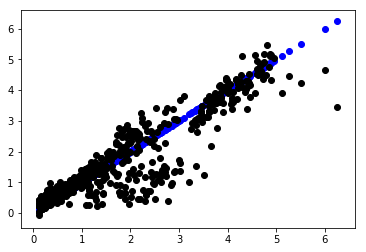

In [172]:
#visualizing results
pyplot.scatter(train_data_frame['charges'], train_output,\
    color='blue')
pyplot.scatter(train_data_frame['charges'], train_prediction_list,\
    color='black')

In [173]:
#train error
metrics.mean_squared_error(train_output, train_prediction_list)

0.19101440618250545

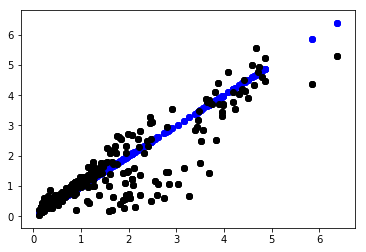

In [174]:
test_output_prediction = polynomial_regression_model.predict(test_input)
test_prediction_list = test_output_prediction.reshape(-1,)

#visualizing results
for i in range(3):
    pyplot.scatter(test_data_frame['charges'], test_output,\
        color='blue')
    pyplot.scatter(test_data_frame['charges'], test_prediction_list,\
        color='black')

In [175]:
#test error
metrics.mean_squared_error(test_output, test_prediction_list)

0.3032907327857672

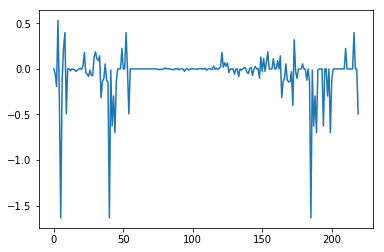

In [176]:
pyplot.plot(polynomial_regression_model.steps[1][1].coef_[0])

Text(0,0.5,'score')

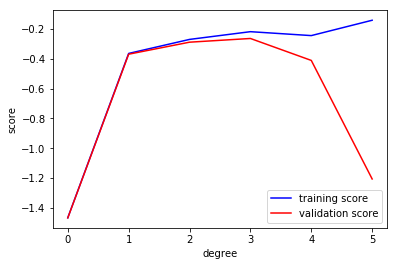

In [177]:
#validation curve

degree_list = numpy.arange(0, 6)

complete_input_data_frame = transformed_insurance_data_frame.drop(columns=['sex', 'smoker'])

complete_input = complete_input_data_frame.drop(columns=['charges']).values
complete_output = complete_input_data_frame['charges'].values

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

train_score_list, validation_score_list = validation_curve(PolynomialRegression(),
    complete_input, complete_output, param_name='polynomialfeatures__degree', param_range=degree_list, cv=10,
    scoring='neg_mean_squared_error')

# print(train_score_list)
# numpy.mean(train_score_list, 1)
pyplot.plot(degree_list, numpy.mean(train_score_list, 1), color='blue', label='training score')
pyplot.plot(degree_list, numpy.mean(validation_score_list, 1), color='red', label='validation score')
pyplot.legend(loc='best')
# pyplot.ylim(0, 1)
pyplot.xlabel('degree')
pyplot.ylabel('score')

In [178]:
#ridge polynomial regression
degrees = 3
ridge_polynomial_regression_model = make_pipeline(PolynomialFeatures(degrees),
                                            Ridge())

ridge_polynomial_regression_model.fit(train_input, train_output.reshape(-1, 1))

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [179]:
train_output_prediction = ridge_polynomial_regression_model.predict(train_input)
train_prediction_list = train_output_prediction.reshape(-1,)

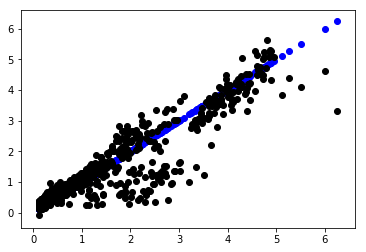

In [180]:
#visualizing results
pyplot.scatter(train_data_frame['charges'], train_output,\
    color='blue')
pyplot.scatter(train_data_frame['charges'], train_prediction_list,\
    color='black')

In [181]:
#train error
metrics.mean_squared_error(train_output, train_prediction_list)

0.19400115913061294

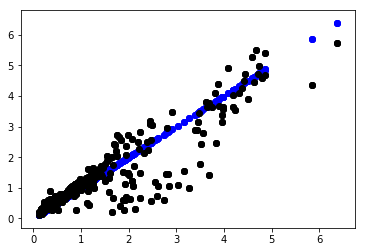

In [182]:
test_output_prediction = ridge_polynomial_regression_model.predict(test_input)
test_prediction_list = test_output_prediction.reshape(-1,)

#visualizing results
for i in range(3):
    pyplot.scatter(test_data_frame['charges'], test_output,\
        color='blue')
    pyplot.scatter(test_data_frame['charges'], test_prediction_list,\
        color='black')

In [183]:
#test error
metrics.mean_squared_error(test_output, test_prediction_list)

0.28457991745136313

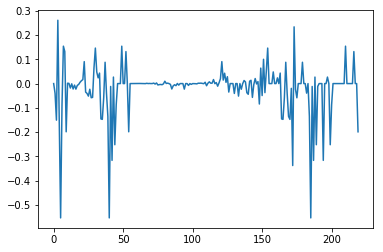

In [184]:
pyplot.plot(ridge_polynomial_regression_model.steps[1][1].coef_[0])

Text(0,0.5,'score')

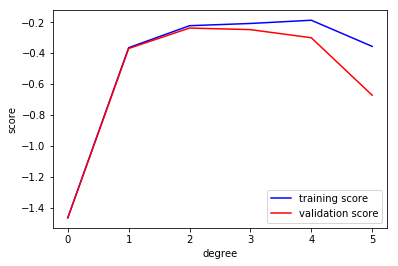

In [185]:
#validation curve

degree_list = numpy.arange(0, 6)

complete_input_data_frame = transformed_insurance_data_frame.drop(columns=['sex', 'smoker'])

complete_input = complete_input_data_frame.drop(columns=['charges']).values
complete_output = complete_input_data_frame['charges'].values

def RidgePolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         Ridge(**kwargs))

train_score_list, validation_score_list = validation_curve(RidgePolynomialRegression(),
    complete_input, complete_output, param_name='polynomialfeatures__degree', param_range=degree_list, cv=10,
    scoring='neg_mean_squared_error')

# print(train_score_list)
# numpy.mean(train_score_list, 1)
pyplot.plot(degree_list, numpy.mean(train_score_list, 1), color='blue', label='training score')
pyplot.plot(degree_list, numpy.mean(validation_score_list, 1), color='red', label='validation score')
pyplot.legend(loc='best')
# pyplot.ylim(0, 1)
pyplot.xlabel('degree')
pyplot.ylabel('score')

In [186]:
# model selection : parameter tuning
parameter_values_list = [
    {
        'polynomialfeatures__degree': numpy.arange(0, 4),
        'ridge__alpha': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4]
    }
]

grid_search_model = GridSearchCV(RidgePolynomialRegression(), parameter_values_list, cv=10,
                       scoring='neg_mean_squared_error')
grid_search_model.fit(complete_input, complete_output)
grid_search_model.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 1}

In [187]:
#recursive feature selection
rfecv = RFECV(estimator=LinearRegression(), step=1, cv=10,
              scoring='neg_mean_squared_error')

rfecv.fit(complete_input, complete_output)

complete_column_list = complete_input_data_frame.drop(columns=['charges']).columns 
# pandas.Series(index=complete_column_list, data=rfecv.get_support())
pandas.Series(index=complete_column_list, data=rfecv.ranking_)

age                 1
bmi                 1
children            1
is_male             2
is_smoker           1
region_northeast    1
region_northwest    1
region_southeast    1
region_southwest    1
dtype: int64

In [188]:
#LASSO regression
degrees = 3
lasso_polynomial_regression_model = make_pipeline(PolynomialFeatures(degrees),
                                            Lasso())

lasso_polynomial_regression_model.fit(train_input, train_output.reshape(-1, 1))

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [189]:
train_output_prediction = lasso_polynomial_regression_model.predict(train_input)
train_prediction_list = train_output_prediction.reshape(-1,)

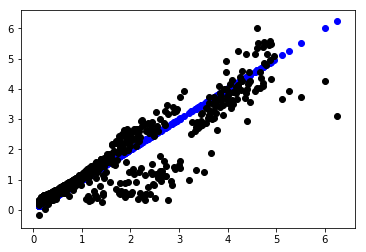

In [190]:
#visualizing results
pyplot.scatter(train_data_frame['charges'], train_output,\
    color='blue')
pyplot.scatter(train_data_frame['charges'], train_prediction_list,\
    color='black')

In [191]:
#train error
metrics.mean_squared_error(train_output, train_prediction_list)

0.21856696294322148

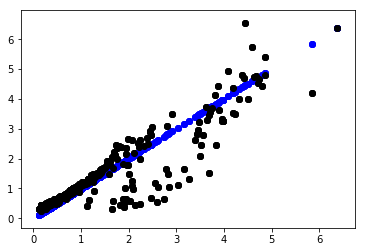

In [192]:
test_output_prediction = lasso_polynomial_regression_model.predict(test_input)
test_prediction_list = test_output_prediction.reshape(-1,)

#visualizing results
for i in range(3):
    pyplot.scatter(test_data_frame['charges'], test_output,\
        color='blue')
    pyplot.scatter(test_data_frame['charges'], test_prediction_list,\
        color='black')

In [193]:
#test error
metrics.mean_squared_error(test_output, test_prediction_list)

0.2772246842654914

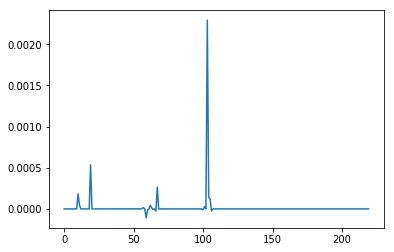

In [194]:
pyplot.plot(lasso_polynomial_regression_model.steps[1][1].coef_)

Text(0,0.5,'score')

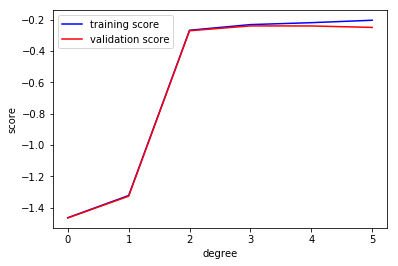

In [195]:
#validation curve

degree_list = numpy.arange(0, 6)

complete_input_data_frame = transformed_insurance_data_frame.drop(columns=['sex', 'smoker'])

complete_input = complete_input_data_frame.drop(columns=['charges']).values
complete_output = complete_input_data_frame['charges'].values

def LassoPolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         Lasso(**kwargs))

train_score_list, validation_score_list = validation_curve(LassoPolynomialRegression(),
    complete_input, complete_output, param_name='polynomialfeatures__degree', param_range=degree_list, cv=10,
    scoring='neg_mean_squared_error')

# print(train_score_list)
# numpy.mean(train_score_list, 1)
pyplot.plot(degree_list, numpy.mean(train_score_list, 1), color='blue', label='training score')
pyplot.plot(degree_list, numpy.mean(validation_score_list, 1), color='red', label='validation score')
pyplot.legend(loc='best')
# pyplot.ylim(0, 1)
pyplot.xlabel('degree')
pyplot.ylabel('score')

In [196]:
# model selection : parameter tuning
parameter_values_list = [
    {
        'polynomialfeatures__degree': numpy.arange(0, 4),
        'lasso__alpha': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4]
    }
]

grid_search_model = GridSearchCV(LassoPolynomialRegression(), parameter_values_list, cv=10,
                       scoring='neg_mean_squared_error')
grid_search_model.fit(complete_input, complete_output)
grid_search_model.best_params_

{'lasso__alpha': 0.001, 'polynomialfeatures__degree': 2}

In [197]:
grid_search_model.best_score_

-0.23558972648360688

In [198]:
#Elastic Net regression
degrees = 3
elastic_net_polynomial_regression_model = make_pipeline(PolynomialFeatures(degrees),
                                            ElasticNet())

elastic_net_polynomial_regression_model.fit(train_input, train_output.reshape(-1, 1))

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('elasticnet', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])

In [199]:
train_output_prediction = elastic_net_polynomial_regression_model.predict(train_input)
train_prediction_list = train_output_prediction.reshape(-1,)

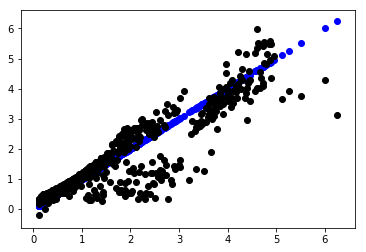

In [200]:
#visualizing results
pyplot.scatter(train_data_frame['charges'], train_output,\
    color='blue')
pyplot.scatter(train_data_frame['charges'], train_prediction_list,\
    color='black')

In [201]:
#train error
metrics.mean_squared_error(train_output, train_prediction_list)

0.21775318117711506

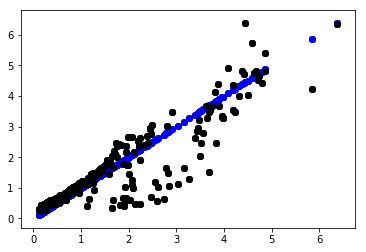

In [202]:
test_output_prediction = elastic_net_polynomial_regression_model.predict(test_input)
test_prediction_list = test_output_prediction.reshape(-1,)

#visualizing results
for i in range(3):
    pyplot.scatter(test_data_frame['charges'], test_output,\
        color='blue')
    pyplot.scatter(test_data_frame['charges'], test_prediction_list,\
        color='black')

In [203]:
#test error
metrics.mean_squared_error(test_output, test_prediction_list)

0.27506715617284355

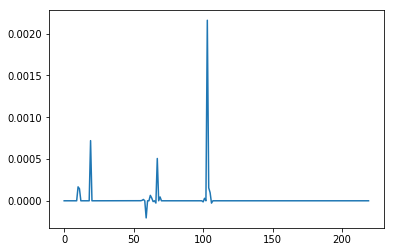

In [217]:
pyplot.plot(elastic_net_polynomial_regression_model.steps[1][1].coef_)

Text(0,0.5,'score')

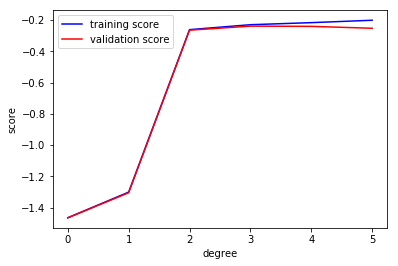

In [205]:
#validation curve

degree_list = numpy.arange(0, 6)

complete_input_data_frame = transformed_insurance_data_frame.drop(columns=['sex', 'smoker'])

complete_input = complete_input_data_frame.drop(columns=['charges']).values
complete_output = complete_input_data_frame['charges'].values

def ElasticNetPolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         ElasticNet(**kwargs))

train_score_list, validation_score_list = validation_curve(ElasticNetPolynomialRegression(),
    complete_input, complete_output, param_name='polynomialfeatures__degree', param_range=degree_list, cv=10,
    scoring='neg_mean_squared_error')

# print(train_score_list)
# numpy.mean(train_score_list, 1)
pyplot.plot(degree_list, numpy.mean(train_score_list, 1), color='blue', label='training score')
pyplot.plot(degree_list, numpy.mean(validation_score_list, 1), color='red', label='validation score')
pyplot.legend(loc='best')
# pyplot.ylim(0, 1)
pyplot.xlabel('degree')
pyplot.ylabel('score')

In [206]:
# model selection : parameter tuning
parameter_values_list = [
    {
        'polynomialfeatures__degree': numpy.arange(0, 4),
        'elasticnet__alpha': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4],
        'elasticnet__l1_ratio': [1, 0.75, 0.5, 0.25]   
    }
]

grid_search_model = GridSearchCV(ElasticNetPolynomialRegression(), parameter_values_list, cv=10,
                       scoring='neg_mean_squared_error')
grid_search_model.fit(complete_input, complete_output)
grid_search_model.best_params_

{'elasticnet__alpha': 0.001,
 'elasticnet__l1_ratio': 1,
 'polynomialfeatures__degree': 2}

In [207]:
grid_search_model.best_score_

-0.23558972648360688

In [349]:
#Random forest regressor
degrees = 3
random_forest_polynomial_regression_model = make_pipeline(PolynomialFeatures(degrees),
                                            RandomForestRegressor())

random_forest_polynomial_regression_model.fit(train_input, train_output.reshape(-1, 1))

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impu...timators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [350]:
train_output_prediction = random_forest_polynomial_regression_model.predict(train_input)
train_prediction_list = train_output_prediction.reshape(-1,)

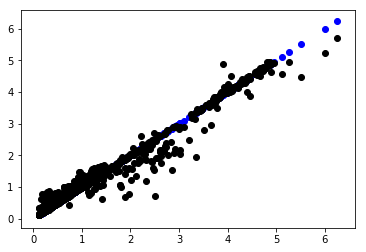

In [351]:
#visualizing results
pyplot.scatter(train_data_frame['charges'], train_output,\
    color='blue')
pyplot.scatter(train_data_frame['charges'], train_prediction_list,\
    color='black')

In [352]:
#train error
metrics.mean_squared_error(train_output, train_prediction_list)

0.04491944936309399

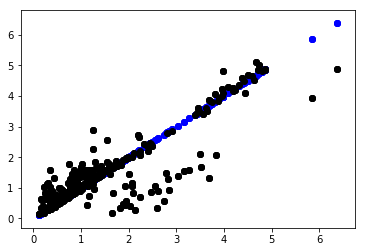

In [353]:
test_output_prediction = random_forest_polynomial_regression_model.predict(test_input)
test_prediction_list = test_output_prediction.reshape(-1,)

#visualizing results
for i in range(3):
    pyplot.scatter(test_data_frame['charges'], test_output,\
        color='blue')
    pyplot.scatter(test_data_frame['charges'], test_prediction_list,\
        color='black')

In [354]:
#test error
metrics.mean_squared_error(test_output, test_prediction_list)

0.31210115395395227

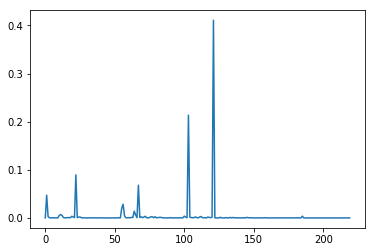

In [355]:
pyplot.plot(random_forest_polynomial_regression_model.steps[1][1].feature_importances_)

Text(0,0.5,'score')

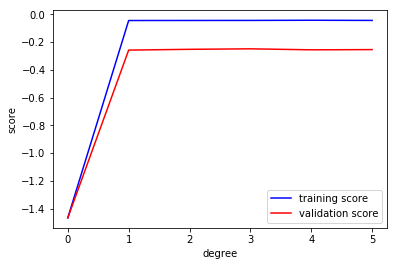

In [214]:
#validation curve

degree_list = numpy.arange(0, 6)

complete_input_data_frame = transformed_insurance_data_frame.drop(columns=['sex', 'smoker'])

complete_input = complete_input_data_frame.drop(columns=['charges']).values
complete_output = complete_input_data_frame['charges'].values

def RandomForestPolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         RandomForestRegressor(**kwargs))

train_score_list, validation_score_list = validation_curve(RandomForestPolynomialRegression(),
    complete_input, complete_output, param_name='polynomialfeatures__degree', param_range=degree_list, cv=10,
    scoring='neg_mean_squared_error')

# print(train_score_list)
# numpy.mean(train_score_list, 1)
pyplot.plot(degree_list, numpy.mean(train_score_list, 1), color='blue', label='training score')
pyplot.plot(degree_list, numpy.mean(validation_score_list, 1), color='red', label='validation score')
pyplot.legend(loc='best')
# pyplot.ylim(0, 1)
pyplot.xlabel('degree')
pyplot.ylabel('score')

In [307]:
# model selection : parameter tuning
parameter_values_list = [
    {
        'polynomialfeatures__degree': [1],
        'randomforestregressor__max_leaf_nodes': numpy.arange(20, 200, 20),
        'randomforestregressor__max_depth': numpy.arange(3, 50, 5)
    }
]

grid_search_model = GridSearchCV(RandomForestPolynomialRegression(), parameter_values_list, cv=10,
                       scoring='neg_mean_squared_error')
grid_search_model.fit(complete_input, complete_output)
grid_search_model.best_params_

{'polynomialfeatures__degree': 1,
 'randomforestregressor__max_depth': 3,
 'randomforestregressor__max_leaf_nodes': 40}

In [308]:
grid_search_model.best_score_

-0.2070832271388267

In [309]:
grid_search_score_data_frame = pandas.DataFrame(data=grid_search_model.cv_results_)
grid_search_score_data_frame.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_polynomialfeatures__degree,param_randomforestregressor__max_depth,param_randomforestregressor__max_leaf_nodes,params,rank_test_score,split0_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.027728,0.001821,-0.210993,-0.183393,1,3,20,"{'polynomialfeatures__degree': 1, 'randomfores...",14,-0.183852,...,-0.282683,-0.176409,-0.165133,-0.186685,-0.229894,-0.181183,0.003682,0.000410,0.056611,0.005327
1,0.025285,0.001578,-0.207083,-0.183406,1,3,40,"{'polynomialfeatures__degree': 1, 'randomfores...",1,-0.183880,...,-0.274645,-0.175345,-0.163196,-0.186604,-0.221951,-0.180743,0.001167,0.000035,0.056018,0.005831
2,0.025376,0.001749,-0.207946,-0.183503,1,3,60,"{'polynomialfeatures__degree': 1, 'randomfores...",5,-0.181597,...,-0.283550,-0.177661,-0.166522,-0.187406,-0.227715,-0.182047,0.000950,0.000358,0.055114,0.005256
3,0.026291,0.001590,-0.208000,-0.183362,1,3,80,"{'polynomialfeatures__degree': 1, 'randomfores...",6,-0.173188,...,-0.286821,-0.176583,-0.168289,-0.188305,-0.229175,-0.180953,0.001959,0.000044,0.057422,0.005320
4,0.025856,0.001745,-0.208185,-0.182581,1,3,100,"{'polynomialfeatures__degree': 1, 'randomfores...",7,-0.176040,...,-0.277368,-0.176642,-0.168621,-0.186660,-0.227771,-0.181883,0.001504,0.000371,0.054371,0.005384


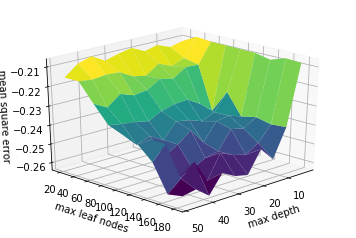

In [310]:
x_axis_value_list = numpy.array(parameter_values_list[0]['randomforestregressor__max_depth'])
y_axis_value_list = numpy.array(parameter_values_list[0]['randomforestregressor__max_leaf_nodes'])

def search_grid(x, y):
    return grid_search_score_data_frame.loc[\
        (grid_search_score_data_frame['param_randomforestregressor__max_depth'] == x) &\
        (grid_search_score_data_frame['param_randomforestregressor__max_leaf_nodes'] == y)][\
        'mean_test_score']

x_axis_mesh, y_axis_mesh = numpy.meshgrid(x_axis_value_list, y_axis_value_list)
z_axis_mesh = numpy.vectorize(search_grid)(x_axis_mesh, y_axis_mesh)


axes = pyplot.axes(projection='3d')
axes.plot_surface(x_axis_mesh, y_axis_mesh, z_axis_mesh, rstride=1, cstride=1,\
                  cmap='viridis', edgecolor='none')
axes.set_xlabel('max depth')
axes.set_ylabel('max leaf nodes')
axes.set_zlabel('mean square error');

axes.view_init(25, 45)